<a href="https://colab.research.google.com/github/beamscource/colab_notebooks/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch

Summary based on https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html 

Additional resources taken from Programming PyTorch (https://github.com/falloutdurham/beginners-pytorch-deep-learning), NLP with PyTorch and https://deeplearning.cs.cmu.edu/F22/index.html.

### Introduction

PyTorch is a Python library which offers an **eager approach to differentiation** instead of defining static graphs, allowing for greater flexibility in the way networks are created, trained, and operated.

Similar to DyNet and Chainer, and in contrast to static frameworks like TensorFlow/Theano/Caffe, models are not compiled before execution. 

PyTorch has two lineages. First, it derives many features and concepts from Torch, which was a Lua-based neural network library that dates back to 2002. Its other major parent is Chainer, created in Japan in 2015.

The library also comes with modules that help with manipulating text, images, and audio (*torchtext*, *torchvision*, and *torchaudio*), along with built-in variants of popular architectures such as ResNet (with weights that can be downloaded to provide assistance with *transfer learning*).

In 2022, about 85% of pre-trained models on HuggingFace are PyTorch models (https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/). Despite the fact that PyTorch is used by companies like Twitter, Salesforce, Tesla, Uber, and NVIDIA, the consensus seems to be that TF still offers better native deployment capabilities and that tf.keras might be better suited for a complete beginner.

All code examples can be found at https://github.com/falloutdurham/beginners-pytorch-deep-learning For more infos and tutorials see https://pytorch.org/hub/

In [2]:
import torch
import numpy as np

In [2]:
torch.__version__

'1.12.1+cu113'

### Tensors

#### Basics

Tensors are objects ("multidimensional arrays" or matrices) which hold numerical data of a single type used to propagate through the network. For example, a 1st-order tensor is a vector (one dimensional array) and 2nd-order tensor is a matrix. If you are coming from Matlab or NumPy, this feels very familiar.

In [17]:
# creating a tensor from Python lists
x = torch.tensor([[0,7,1],[1,2,3],[0,4,5],[0,4,5]])
print(x)

tensor([[0, 7, 1],
        [1, 2, 3],
        [0, 4, 5],
        [0, 4, 5]])


In [ ]:
x.type()

'torch.LongTensor'

In [18]:
# investigating the size of a tensor
x.shape

torch.Size([4, 3])

In [19]:
# or
x.size()

torch.Size([4, 3])

In [20]:
# helper function to investigate a tensor
def describe(x):
  print(f"Type: {x.type()}")
  print(f"Shape/size: {x.shape}")
  print(f"Values: \n{x}")

In [21]:
describe(torch.Tensor(2, 3))
describe(torch.rand(2, 3))   # uniform randomdescribe
describe(torch.randn(2, 3))  # random normal

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1.9929e-34, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 1.6816e-43]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.4470, 0.9842, 0.6754],
        [0.2357, 0.9707, 0.9322]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-0.5054,  1.9536,  1.5737],
        [ 0.6646, -0.0305, -0.0932]])


In [ ]:
# special tensors
describe(torch.eye(3))
describe(torch.ones(2,3))
describe(torch.zeros(2,3))
describe(torch.arange(0,3))

Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([0, 1, 2])


In [ ]:
# creating a tensor from NumPy array
# the type of the created tensor is DoubleTensor which corresponds to NumPy
# float64 matrix
npy  =  np.random.rand(2,  3)
describe(torch.from_numpy(npy))
# or
describe(torch.as_tensor(npy))
npy

In [ ]:
# export to numpy array
x_np = x.numpy()
print(x_np)

[[0 0 1]
 [1 1 1]
 [0 0 0]]


torch.tensor() always copies data. If you have a numpy array and want to avoid a copy, use torch.as_tensor().

In [ ]:
# create uninitialized tensor
x = torch.FloatTensor(2,3)
print(x)
# initialize/set to zeros
x.zero_()
print(x)

tensor([[1.9839e-35, 0.0000e+00, 1.4013e-45],
        [0.0000e+00, 2.8026e-45, 0.0000e+00]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# create random tensor (seed for repeatability)
torch.manual_seed(123)
x=torch.randn(2,3)
print(x)

#### Different types

The default  tensor  type  when  using  torch.Tensor  constructor  is  a torch.FloatTensor. But it's possible to convert it to float,  long,  double format  by  specifying  it  at the initialization  or  using  one  of  the typecasting  methods. The most common types you will use are `IntTensor` and `FloatTensor`.

See more infos at https://pytorch.org/docs/stable/tensors.html

In [ ]:
# using dtype at initialization
torch.zeros([2, 4], dtype=torch.int32)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
# calling a specific constructor at initialization
x = torch.FloatTensor([[1, 2, 3],
                   [4,5,6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
# typecasting
x.long()

#### Indexing and slicing

In [25]:
# creating a tensor with a short-cut
x = torch.arange(6).view(2, 3)
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [27]:
# indexing into a tensor works like in hierarchical lists (standard Python)
x[0][1:3]

tensor([4, 5])

In [ ]:
# but also like in NumPy
x[0,0]

tensor(0)

In [31]:
# access the first two elements in the first row (indexing is starting at zero)
# take from the row at index zero all elements until the element at index 2
x[1, :2] 

tensor([3, 4])

In [ ]:
x[1,1:]

tensor([4, 5])

In [ ]:
# access scalar values from a single-element tensor
torch.rand(1).item()


0.5620666146278381

In [ ]:
# replace all elements of a tensor
x = torch.ones(4,8)
x.fill_(5)
x

Any PyTorch method with an underscore (_) refers to an inplace operation; that is, it modifies the content in place without creating a new object.

In [ ]:
# indexing using PyTorch functions
# indices have to be of the type LongTensor
print(x)
indices = torch.LongTensor([0, 0])
# joining first row into a new tensor
describe(torch.index_select(x, dim=0, index=indices))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 6])
Values: 
tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16]])


In [ ]:
# extracting non-contogous elements by passing tensors as indices
print(x)
row_indices = torch.arange(2).long() # take from rows zero and one
col_indices = torch.LongTensor([0, 1]) # take from colums zero and one
print(row_indices)
print(col_indices)
describe(x[row_indices, col_indices])

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
tensor([0, 1])
tensor([0, 1])
Type: torch.FloatTensor
Shape/size: torch.Size([2])
Values: 
tensor([1.4068e-34, 1.5956e+25])


#### Concatenating

In [ ]:
# on columns
print(x)
describe(torch.cat([x, x], dim=0))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([4, 6])
Values: 
tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00],
        [1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])


In [ ]:
# on rows
print(y)
describe(torch.cat([y, y], dim=1))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([3, 8])
Values: 
tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00, 1.4068e-34, 0.0000e+00,
         3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25,        nan, 4.7399e+16,
         4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00, 4.7399e+16, 2.3868e-06,
         1.4838e-41, 0.0000e+00]])


In [ ]:
# to keep tensors as separated elements
print(y)
describe(torch.stack([y, y], dim=0))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3, 4])
Values: 
tensor([[[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
         [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
         [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]],

        [[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
         [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
         [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]]])


In [ ]:
print(y)
describe(torch.stack([y, y], dim=1))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([3, 2, 4])
Values: 
tensor([[[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
         [1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00]],

        [[       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
         [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25]],

        [[4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00],
         [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]]])


#### Manipulating tensors' dimensions

In [ ]:
# change dimensions of the tensor
x = torch.Tensor(2,6)
print(x)
# view is not changing the original tensor
# you have to assign it to a new tensor
x.view(3, 4)

tensor([[1.4062e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 1.5975e-43],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 1.5695e-43]])


tensor([[1.4062e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 1.5975e-43, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 1.5695e-43]])

In [ ]:
print(x)
y = x.view(3, 4)
print(y)

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])


In [ ]:
# or if you want to operate on non-contigous tensors
print(x)
y = x.reshape(3, 4)
print(y)

tensor([[1.4062e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 1.5975e-43],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 1.5695e-43]])
tensor([[1.4062e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 1.5975e-43],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 1.5695e-43]])


In [ ]:
# transposing a tensor (columns become rows)
torch.transpose(y, 0, 1)

tensor([[1.4068e-34,        nan, 4.7399e+16],
        [0.0000e+00, 4.7399e+16, 2.3868e-06],
        [3.3631e-44, 4.4721e+21, 1.4838e-41],
        [0.0000e+00, 1.5956e+25, 0.0000e+00]])

In [ ]:
# re-arrange dimensions of a tensor
x = torch.rand(640, 480, 3)
y = x.permute(2,0,1)
y.shape

torch.Size([3, 640, 480])

#### Operations on tensors (matrix algebra)

Pytorch math and linear algebra is also similar to Numpy. Operators are overridden so you can use standard math operators (`+`,`-`, etc.) and expect a tensor as a result. See pytorch documentation for a complete list of available functions.

In [ ]:
x = torch.arange(0.,5.)
print(torch.sum(x))
print(torch.sum(torch.exp(x)))
print(torch.mean(x))

tensor(10.)
tensor(85.7910)
tensor(2.)


In [ ]:
# element-wise additon with mathematical symbols
torch.ones(1,2) + torch.ones(1,2)

tensor([[2., 2.]])

In [ ]:
# or with built-in methods
torch.add(torch.ones(1,2), torch.ones(1,2))

tensor([[2., 2.]])

In [ ]:
# summing alog the colums
print(y)
describe(torch.sum(y, dim=0))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([4])
Values: 
tensor([       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25])


In [ ]:
# or rows
describe(torch.sum(y, dim=1))

Type: torch.FloatTensor
Shape/size: torch.Size([3])
Values: 
tensor([1.4068e-34,        nan, 4.7399e+16])


In [ ]:
# matrix multiplication
describe(torch.mm())

In [ ]:
# access the max value
x.max().item()

4.0

#### Broadcasting

Borrowed from NumPy, broadcasting allows to perform operations between a tensor and a smaller tensor. You can broadcast across two tensors if, starting backward from their trailing dimensions: 
- the two dimensions are equal
- one of the dimensions is 1

#### GPU vs CPU tensors

Tensors can be copied between CPU and GPU. It is important that everything involved in a calculation is on the same device. 

By default, PyTorch tensors are created to be used by a CPU.

In [ ]:
cpu_tensor = torch.rand(2)
cpu_tensor.device

device(type='cpu')

When doing linear algebra operations it make sense to utilize a GPU. To use a GPU, you need to first allocate the tensor on the GPU’s memory. Access to GPUs is provided via CUDA API that was created by NVIDIA and is limited to use only NVIDIA GPUs.

In [ ]:
# in colab you need to change runtime environment for this to work
# transfer a tensor to a GPU
gpu_tensor = cpu_tensor.to("cuda")
gpu_tensor.device

In [ ]:
x = torch.rand(3,2)
# copy to GPU
y = x.cuda()
# copy back to CPU
z = y.cpu()
# get CPU tensor as numpy array
# cannot get GPU tensor as numpy array directly
try:
    y.numpy()
except RuntimeError as e:
    print(e)

Operations between GPU and CPU tensors will fail. Operations require all arguments to be on the same device.

In [ ]:
x = torch.rand(3,5)  # CPU tensor
y = torch.rand(5,4).cuda()  # GPU tensor
try:
    torch.mm(x,y)  # Operation between CPU and GPU fails
except TypeError as e:
    print(e)

In [ ]:
# Copy to CPU if on GPU
if y.is_cuda:
    y = y.cpu()
    print(y, y.dtype)

A convenient method is `new`, which creates a new tensor on the same device as another tensor. It should be used for creating tensors whenever possible.

In [ ]:
x1 = torch.rand(3,2)
x2 = x1.new(1,2)  # create cpu tensor
print(x2)
x1 = torch.rand(3,2).cuda()
x2 = x1.new(1,2)  # create cuda tensor
print(x2)

To be device agnostic and write code that works whether it’s on the GPU or the CPU:

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

x = torch.rand(3, 3).to(device)
describe(x)

cpu
Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.6116, 0.3273, 0.7642],
        [0.8197, 0.4571, 0.1784],
        [0.9317, 0.1341, 0.0010]])


Computations will break if both tensors involved are not used on the same device. It's computationally expensive to move data back and forth and therefore typical procedure involves doing parallelizable operations on the GPU and transfer the final results to the CPU.

In case you have multiple GPUs, the best practice is to use the CUDA_VISIBLE_DEVICES as environment variable when executing the Python training script.

In [ ]:
CUDA_VISIBLE_DEVICES=0,1,2,3 python main.py

Calculations executed on the GPU can be many times faster than numpy. However, numpy is still optimized for the CPU and many times faster than python `for loops`. Numpy calculations may be faster than GPU calculations for small arrays due to the cost of interfacing with the GPU.

In [ ]:
from timeit import timeit
# Create random data
x = torch.rand(1000,64)
y = torch.rand(64,32)
number = 10000  # number of iterations

def square():
    z=torch.mm(x, y) # dot product (mm=matrix multiplication)

# Time CPU
print('CPU: {}ms'.format(timeit(square, number=number)*1000))
# Time GPU
x, y = x.cuda(), y.cuda()
print('GPU: {}ms'.format(timeit(square, number=number)*1000))

CPU: 547.9166890000045ms
GPU: 2637.6892470000257ms


#### Differentiation within a network

Apart from storing the data itself, PyTorch tensors handle the intermediate results of gradient computation by setting *requires_grad* flag to True at instantiation time. This is required for model training.

At the end of a forward pass through the network, a single scalar (*loss*) is used to compute the backward pass which is initiated by using the *backward()* method. During the backward propagation, gradient vectors are computed for all tensors which where involved during the forward pass.  

It's possible to access the gradients for all nodes of the computational graph by using the *.grad* variable of a tensor. The network optimizer uses this variable to update the values of the parameters (model weights). 

What you need to remember :

- Tensors you are differentiating with respect to must have `requires_grad=True`
- Call `.backward()` on scalar variables you are differentiating
- To differentiate a vector, sum it first

In [3]:
x = torch.ones(2, 2, requires_grad=True)
print(x.grad)

None


In [4]:
# we require a scalar to apply the backward method to it
x = x.mean()
x.backward()

Differentiation accumulates gradients. This is sometimes what you want and sometimes not.

**Make sure to zero gradients between batches if performing gradient descent or you will get strange results!**

In [5]:
# Create a variable
x=torch.tensor(torch.arange(0.,4.), requires_grad=True)
# Differentiate
torch.sum(x**2).backward()
print(x.grad)
# Differentiate again (accumulates gradient)
torch.sum(x**2).backward()
print(x.grad)
# Zero gradient before differentiating
x.grad.data.zero_()
torch.sum(x**2).backward()
print(x.grad)

tensor([0., 2., 4., 6.])
tensor([ 0.,  4.,  8., 12.])
tensor([0., 2., 4., 6.])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Note that a Tensor with gradient cannot be exported to numpy directly:

In [6]:
x=torch.tensor(torch.arange(0.,4.), requires_grad=True)
x.numpy() # raises an exception

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


RuntimeError: ignored

The reason is that pytorch remembers the graph of all computations to perform differenciation. To be integrated to this graph the raw data is wrapped internally to the Tensor class.

You can detach the tensor from the graph using the .detach() method, which returns a tensor with the same data but requires_grad set to False.

In [ ]:
x.detach().numpy()

Another reason to use this method is that updating the graph can use a lot of memory. If you are in a context where you have a differentiable tensor that you don't need to differentiate, think of detaching it from the graph.

### Network modules

#### The network

We will use a tiny neural network with two input neurons and four hidden neurons. As we perform binary classification, we will use a single output neuron.

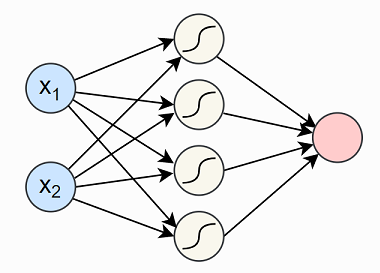

The `torch.nn` module defines a series of useful classes like linear networks layers, activation functions, loss functions etc. A full list can be found at https://pytorch.org/docs/stable/nn.html.

In [ ]:
import torch
import torch.nn as nn

To create a basic network, we can use the `nn.Sequential` class.

In [8]:
# in this example the activation functions are included in the layers object and
# the forward method just calls it

class SimpleClassifier(nn.Module): # 1. define a net class inheriting from nn.Module
  '''
    Simple Neural Network
  '''
  def __init__(self): # 2. define a constructor with obligatory self argument; see https://www.geeksforgeeks.org/self-in-python-class/
    super().__init__() # 3. inherit the costructor method from nn.Module
    self.layers = nn.Sequential(
      nn.Linear(2, 4), # input, output
      nn.Tanh(),
      nn.Linear(4, 1)
    )

  def forward(self, x): # 4. define a forward method
    '''Forward pass'''
    return self.layers(x) # 5. when using nn.Sequential, the forward method is already implemented

model = SimpleClassifier()
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=1, bias=True)
  )
)


There are further alternatives, like `nn.ModuleList` and `nn.ModuleDict`, that allow you to have different data structures of network modules.

See https://discuss.pytorch.org/t/when-should-i-use-nn-modulelist-and-when-should-i-use-nn-sequential/5463/6

Additionally to `torch.nn`, there is also `torch.nn.functional`. It contains functions that are used in network layers.

This is in contrast to `torch.nn` which defines them as `nn.Modules`, and `torch.nn` actually uses a lot of functionalities from `torch.nn.functional`.

Hence, the functional package is useful in many situations, and so we import it as well here.

In [ ]:
import torch.nn.functional as F

To be able to define more operations during the forward pass, we again inherit from the *torch.nn.Module*, but fill out the \__init\__ with layer objects. Now, we also don't have to hard-code the layer dimensions and can pass them as arguments. Without using `nn.Sequential` we have to implement the forward pass ourselves:

In [ ]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

The forward function is where the computation of the module takes place, and is executed when you call the module (nn = MyModule(); nn(x)).

In the init function, we usually create the parameters of the module or defining other modules that are used in the forward function.

The backward calculation is done automatically, but could be overwritten as well if wanted.

In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


Printing the model lists all submodules it contains. To access network's parameters we use the **parameters()** method, which returns a python generator.

In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


Each linear layer has a weight matrix of the shape [output, input], and a bias of the shape [output].

#### Datasets and data loaders

PyTorch has developed standard conventions of interacting with training data that make it fairly consistent to work with, whether you’re working with images, text, or audio. Those convetions include *datasets* and *data loaders*.

The dataset class provides an uniform interface to access the training/test data, while the data loader makes sure to efficiently load and stack the data points from the dataset into batches during training.

The dataset class summarizes the basic functionality of a dataset in a natural way. To define a dataset in PyTorch, we simply specify two functions: __getitem__, and __len__. The get-item function has to return the -th data point in the dataset, while the len function returns the size of the dataset.

In [12]:
# to give a better idea how to define a custom set
from torch.utils.data import DataLoader, Dataset

# define your own dataset class by inheriting from PyTorch Dataset 
class XORDataset(Dataset): # 1. inherit from Dataset

    def __init__(self, size, std=0.1): # 2. write a costructor
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__() # 3. inherit from the super costructor
        self.size = size
        self.std = std
        self.generate_continuous_xor() # connect any custom methods to the object instance

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self): # 4. implement a length method
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx): # 5. implement a getitem method
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Let’s try to create such a dataset and inspect it:

In [13]:
train_dataset = XORDataset(size=2500)
print("Size of dataset:", len(train_dataset))
print("Data point 0:", train_dataset[0])

Size of dataset: 2500
Data point 0: (tensor([1.0416, 0.8900]), tensor(0))


To better relate to the dataset, we visualize the samples below.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

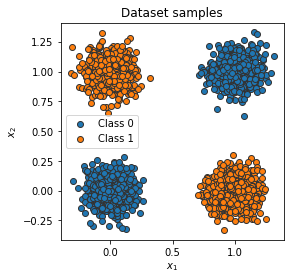

In [15]:
visualize_samples(train_dataset.data, train_dataset.label)
plt.show()

The class `torch.utils.data.DataLoader` represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features.

The data loader communicates with the dataset using the function __getitem__, and stacks its outputs as tensors over the first dimension to form a batch. In contrast to the dataset class, we usually don’t have to define our own data loader class, but can just create an object of it with the dataset as input.

Additionally, we can configure our data loader with the following input arguments (only a selection, see full list at https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader):

- batch_size: Number of samples to stack per batch

- shuffle: If True, the data is returned in a random order. This is important during training for introducing stochasticity.

- num_workers: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.

- pin_memory: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.

- drop_last: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.

In [16]:
# create a DataLoader for the training data
train_data_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [17]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(train_data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([128, 2]) 
 tensor([[ 1.0439e+00,  1.5727e-01],
        [ 8.0886e-01,  1.0072e+00],
        [ 1.4006e-01,  8.6652e-02],
        [-1.0066e-01,  8.2917e-01],
        [-8.5815e-02,  1.1616e-01],
        [ 6.0195e-02, -4.5045e-02],
        [ 1.0117e+00, -1.5524e-01],
        [ 1.0937e+00,  9.2028e-01],
        [ 9.7412e-02,  1.6679e-02],
        [ 1.1716e+00,  5.8812e-02],
        [ 9.9146e-01,  1.1194e+00],
        [ 1.1653e+00,  5.8807e-02],
        [-3.3966e-02,  1.3943e-01],
        [-3.1013e-02, -1.7390e-01],
        [ 1.0496e+00, -5.9310e-02],
        [ 9.9575e-01,  1.1393e+00],
        [ 1.0369e+00,  1.0404e+00],
        [-7.7093e-02,  9.8808e-03],
        [ 1.0062e+00,  9.8236e-01],
        [-6.5942e-03,  3.1697e-02],
        [-1.0955e-01, -9.5173e-02],
        [ 1.0077e+00,  1.0009e+00],
        [ 1.2150e+00,  4.7755e-02],
        [-1.6390e-01,  9.7698e-01],
        [ 1.0710e+00, -3.8396e-02],
        [ 8.5512e-01,  1.2093e-01],
        [ 1.0415e+00,  1.1460

The same procedure has to be performed for the *validation* and *test* data sets.

### Training loop

After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:

- Get a batch from the data loader
- Obtain the predictions from the model for the batch
- Calculate the loss based on the difference between predictions and labels
- Backpropagation: calculate the gradients for every parameter with respect to the loss
- Update the parameters of the model in the direction of the gradients

PyTorch  provides a list of predefined loss functions which we can use (see https://pytorch.org/docs/stable/nn.html#loss-functions).

In [18]:
# for binary classification
loss_module = nn.BCEWithLogitsLoss()

To train the network, we need an optimizer. For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. 

In [20]:
# initialize optimizer (before a training loop)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

The optimizer provides two useful functions: optimizer.step(), and optimizer.zero_grad().

The step function updates the parameters based on the gradients as explained above. The function optimizer.zero_grad() sets the gradients of all parameters to zero. 

If we call the backward function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them.

This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call optimizer.zero_grad() before calculating the gradients of a batch.

Now, we can write a small training function. Remember our five steps: load a batch, obtain the predictions, calculate the loss, backpropagate, and update. Additionally, we have to push all data and model parameters to the device of our choice (GPU if available).

In addition, we set our model to training mode. This is done by calling model.train(). There exist certain modules that need to perform a different forward step during training than during testing (e.g. BatchNorm and Dropout), and we can switch between them using model.train() and model.eval().

In [21]:
## Progress bar
from tqdm.notebook import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

To perform the backward pass, we just execute loss.backward() which updates gradients in all differentiable tensors in the graph.

In [22]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

### Saving and loading

In [ ]:
# saving a model
torch.save(model, "our_model.tar")

# loading a model
model = torch.load("our_model.tar")

This stores both the parameters and the structure of the model to a file. This might be a problem if you change the structure of the model at a later point. For this reason, it’s more common to save a model’s state_dict instead.

This is a standard Python dict that contains the maps of each layer’s parameters in the model.

In [ ]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-0.6446,  1.0468],
        [ 2.6138,  3.0301],
        [-1.1551, -1.1321],
        [ 0.5989,  0.1297]])), ('linear1.bias', tensor([ 0.6682, -1.1887,  1.7417, -0.1935])), ('linear2.weight', tensor([[-0.7609,  2.1014,  1.8715, -1.0693]])), ('linear2.bias', tensor([-1.1348]))])


In [ ]:
torch.save(state_dict(), "our_model.tar")

TypeError: ignored

The benefit here is that if you extend the model in some fashion, you can supply a strict=False parameter to load_state_dict that assigns parameters to layers in the model that do exist in the state_dict, but does not fail if the loaded state_dict has layers missing or added from the model’s current structure.

Models can be saved to a disk during a training run and reloaded at another point so that training can continue where you left off.

To load a model from a state dict, we use the function torch.load to load the state dict from the disk, and the module function load_state_dict to overwrite our parameters with the new values:

In [ ]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

A detailed tutorial can be found at https://pytorch.org/tutorials/beginner/saving_loading_models.html

### Evaluation

Once we have trained a model, it is time to evaluate it on a held-out test set. As our dataset consist of randomly generated data points, we need to first create a test set with a corresponding data loader.

In [25]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

When evaluating the model, we don’t need to keep track of the computation graph as we don’t intend to calculate the gradients. This reduces the required memory and speed up the model. In PyTorch, we can deactivate the computation graph using with torch.no_grad(): .... Remember to additionally set the model to eval mode.

In [23]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            #data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [26]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


To visualize what our model has learned, we can perform a prediction for every data point in a range of [-0.5, 1.5], and visualize the predicted class as in the sample figure at the beginning of this section. This shows where the model has created decision boundaries.

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


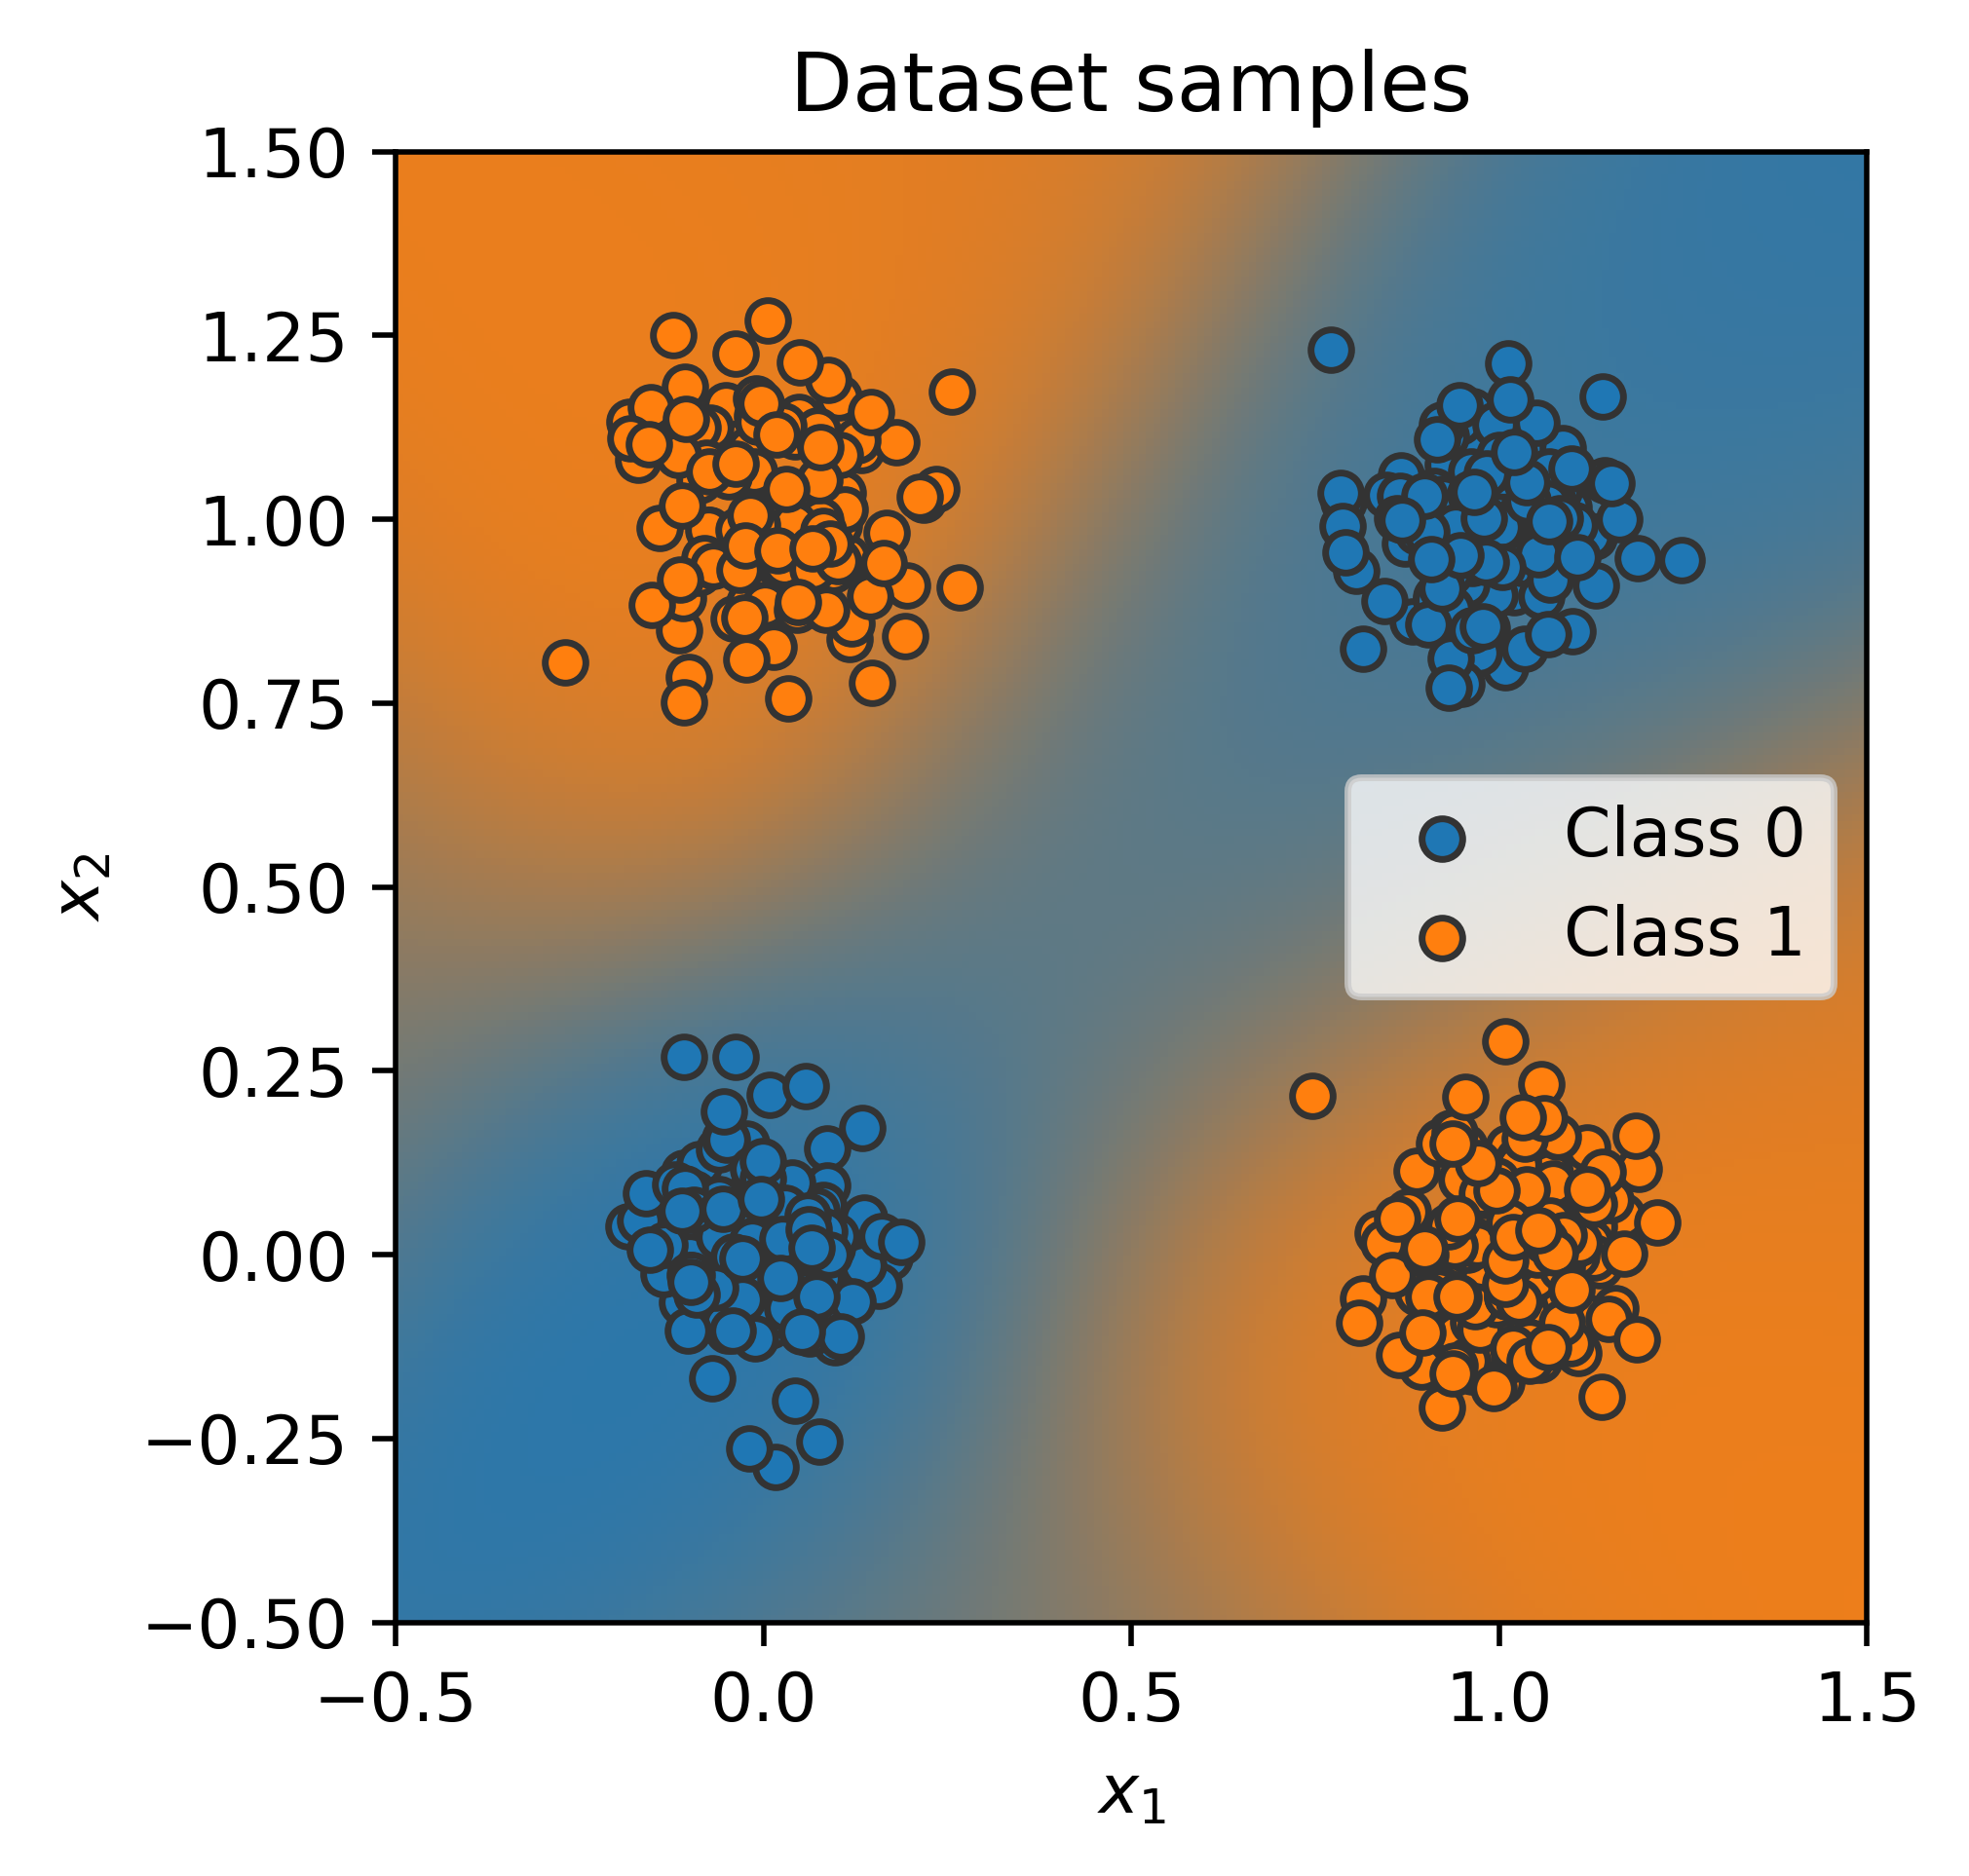

In [28]:
from matplotlib.colors import to_rgba

@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, test_dataset.data, test_dataset.label)
plt.show()

### Experiment logging with Tensorboard

You can find official tutorial at https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

TensorBoard is a logging and visualization tool that is a popular choice for training deep learning models. Although initially published for TensorFlow, TensorBoard is also integrated in PyTorch allowing us to easily use it. First, let’s import it below.

In [ ]:
# Import tensorboard logger from PyTorch
from torch.utils.tensorboard import SummaryWriter

# Load tensorboard extension for Jupyter Notebook, only need to start TB in the notebook
%load_ext tensorboard

The last line is required if you want to run TensorBoard directly in the Jupyter Notebook. Otherwise, you can start TensorBoard from the terminal.

We start the logging process by creating a new object, `writer = SummaryWriter(...)`, where we specify the directory in which the logging file should be saved.

With this object, we can log different aspects of our model by calling functions of the style `writer.add_...`. 

For example, we can visualize the computation graph with the function `writer.add_graph`, or add a scalar value like the loss with `writer.add_scalar`.

Let’s adapt the training loop with adding a TensorBoard logger below.

In [ ]:
def train_model_with_logger(model, optimizer, data_loader, loss_module, val_dataset, num_epochs=100, logging_dir='runs/our_experiment'):
    # Create TensorBoard logger
    writer = SummaryWriter(logging_dir)
    model_plotted = False

    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # For the very first batch, we visualize the computation graph in TensorBoard
            if not model_plotted:
                writer.add_graph(model, data_inputs)
                model_plotted = True

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

            ## Step 6: Take the running average of the loss
            epoch_loss += loss.item()

        # Add average loss to TensorBoard
        epoch_loss /= len(data_loader)
        writer.add_scalar('training_loss',
                          epoch_loss,
                          global_step = epoch + 1)

        # Visualize prediction and add figure to TensorBoard
        # Since matplotlib figures can be slow in rendering, we only do it every 10th epoch
        if (epoch + 1) % 10 == 0:
            fig = visualize_classification(model, val_dataset.data, val_dataset.label)
            writer.add_figure('predictions',
                              fig,
                              global_step = epoch + 1)

    writer.close()

Let’s use this method to train a model as before, with a new model and optimizer.

In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_model_with_logger(model, optimizer, train_data_loader, loss_module, val_dataset=dataset)

  0%|          | 0/100 [00:00<?, ?it/s]

The TensorBoard file in the folder runs/our_experiment now contains a loss curve, the computation graph of our network, and a visualization of the learned predictions over number of epochs. To start the TensorBoard visualizer, simply run the following statement:

In [ ]:
%tensorboard --logdir runs/our_experiment

# Examples - Vanilla PyTorch

### MLP for image classification

Here we build a simple classifier that can tell the difference between cats and dogs.

Download the data from here https://www.kaggle.com/competitions/dogs-vs-cats/data

We split the images of both classes into sub-folders for the train, val, and test split. Resulting in 10k training examples per category and 1.25k validation and test examples.

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/_NN_NLP/PyTorch/datasets/cat_dog.zip . 

In [ ]:
!unzip cat_dog.zip

In [ ]:
import torch
import numpy as np
import torch.nn.functional as F

**Exploring the images**

TO_DO

**Converting raw data into a Dataset**

The torchvision package includes a class called ImageFolder that does pretty much everything for us. The default transform is to take image data and turn it into a tensor (the transforms.ToTensor() method). 

To increase our processing performance, we scale every incoming image to the same resolution of 64 × 64 via the Resize(64) transform. We then convert the images to a tensor, and finally, we normalize the tensor around a specific set of mean and standard deviation points.

Keeping the incoming values between 0 and 1 prevents the values from getting too large during the training phase (known as the exploding gradient problem).

In [ ]:
# creating training, validation, and test sets for the image data
import torchvision
from torchvision import transforms

# see a list of all possible transforms at 
# https://pytorch.org/vision/stable/transforms.html
transforms = transforms.Compose([
    transforms.Resize((64, 64)), # here was a bug;
    # see https://discuss.pytorch.org/t/runtimeerror-stack-expects-each-tensor-to-be-equal-size-but-got-3-224-224-at-entry-0-and-3-224-336-at-entry-3/87211/10
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

train_data_path = "train"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,
                                              transform=transforms)

val_data_path = "val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=transforms)

test_data_path = "test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                            transform=transforms)

In [ ]:
# creating DataLoaders
from torch.utils.data import DataLoader

batch_size=64
train_data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data_loader  = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_data_loader  = DataLoader(test_data, batch_size=batch_size)

**Network**

The forward() method describes how data flows through the network in both training and making predictions (inference).

First, we have to convert the 3D tensor (x (64) * y (64) * three-channels for color information) into a 1D tensor so that it can be fed into the first Linear layer, and we do that using the view().

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch.nn as nn

# network
class SimpleNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(12288, 84) # called Dense in Keras
    self.fc2 = nn.Linear(84, 50)
    self.fc3 = nn.Linear(50,2)
  
  def forward(self, x): # bug was here
    x = x.view(-1, 12288)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# initialize the model
simplenet = SimpleNet()
simplenet.to(device)

SimpleNet(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

From there, you can see that we apply the layers and the activation functions in order, finally returning the softmax output to give us our prediction for that image.

The output of the final layer is equal to 2 neurons, matching up with our two classes of cat or fish. In general, you want the data in your layers to be *compressed* as it goes the network.

If a layer is going to, say, 50 inputs to 100 outputs, then the network might learn by simply passing the 50 connections to 50 of the 100 outputs and consider its job done.

By reducing the size of the output with respect to the input, we force that part of the network to learn a representation of the original input with fewer resources, which hopefully means that it extracts some features of the images that are important to the problem we’re trying to solve.



**Training loop**

In [ ]:
optimizer = torch.optim.Adam(simplenet.parameters(), lr=0.001)

The training loop in a single training function:

In [ ]:
## Progress bar
from tqdm.notebook import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  for epoch in tqdm(range(epochs)):
    
    training_loss = 0.0 # set for the epoch
    valid_loss = 0.0
    
    # start training for the given epoch
    model.train()
    correct = 0
    for inputs, labels in train_loader: # during each batch
      
      inputs = inputs.to(device) # move to GPU
      labels = labels.to(device)
      
      predictions = model(inputs) # get model predictions for the batch
      loss = loss_fn(predictions, labels) # compare model predictions with target labels
      
      optimizer.zero_grad() # zero the gradient
      loss.backward() # compute gradient
      optimizer.step() # take an optimization step
      
      training_loss += loss.item()*inputs.size(0) # accumulating loss over each batch
      _, predicted = predictions.max(1)
      correct += (predicted == labels).sum() # accumulating TP + TN

    # get average training loss for the epoch across all training examples
    # by deviding the accumulated loss by the number of all training examples (20k) 
    training_loss /= len(train_loader.dataset) # len(train_loader) gives number of batches
    # calculate training accuracy for all training examples
    train_accuracy = correct / len(train_loader.dataset)

    # evaluate current model performance once all batches were proccessed
    model.eval()
    correct = 0
    for inputs, labels in val_loader:
      
      inputs = inputs.to(device)
      labels = labels.to(device)

      # Deactivate gradients for making a prediction
      with torch.no_grad(): # (faster and less memory usage)
        predictions = model(inputs)
      loss = loss_fn(predictions, labels)
      valid_loss += loss.item()*inputs.size(0)
        
      _, predicted = predictions.max(1)
      correct += (predicted == labels).sum()
      
    # get average validation loss for the epoch across all validation batches
    valid_loss /= len(val_loader.dataset)
    val_accuracy = correct / len(val_loader.dataset)
    
    print(f'Epoch: {epoch+1}, train_loss: {training_loss:.2f},\
          val_loss: {valid_loss:.2f}, val_accuracy = {val_accuracy:.2f},\
          train_accuracy = {train_accuracy:.2f}')

We can start training by calling the function with the required parameters:

In [ ]:
# takes about 30 minutes on a CPU
train(simplenet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.47,          val_loss: 0.68, val_accuracy = 0.64,          train_accuracy = 0.77
Epoch: 1, train_loss: 0.44,          val_loss: 0.72, val_accuracy = 0.65,          train_accuracy = 0.79
Epoch: 2, train_loss: 0.41,          val_loss: 0.75, val_accuracy = 0.66,          train_accuracy = 0.81
Epoch: 3, train_loss: 0.39,          val_loss: 0.76, val_accuracy = 0.65,          train_accuracy = 0.82
Epoch: 4, train_loss: 0.36,          val_loss: 0.83, val_accuracy = 0.64,          train_accuracy = 0.84
Epoch: 5, train_loss: 0.33,          val_loss: 0.87, val_accuracy = 0.65,          train_accuracy = 0.85
Epoch: 6, train_loss: 0.31,          val_loss: 0.88, val_accuracy = 0.65,          train_accuracy = 0.86
Epoch: 7, train_loss: 0.29,          val_loss: 0.97, val_accuracy = 0.65,          train_accuracy = 0.87
Epoch: 8, train_loss: 0.27,          val_loss: 1.04, val_accuracy = 0.64,          train_accuracy = 0.88


KeyboardInterrupt: ignored

**Inference**

We reuse the transform pipeline we made earlier to convert the image into the correct form for our neural network. However, because our network uses batches, it actually expects a 4D tensor, with the first dimension denoting the different images within a batch.

We don’t have a batch, but we can create a batch of length 1 by using unsqueeze(0), which adds a new dimension at the front of our tensor.

Getting predictions is as simple as passing our batch into the model. We then have to find out the class with the higher probability. 

PyTorch provides the argmax() function, which returns the index of the highest value of the tensor. We then use that to index into our labels array and print out our prediction.

In [ ]:
from PIL import Image

labels = ['cat','dog']

# apply same transformations as to the training examples
# img = Image.open("./test/fish/ninsilver.jpg")
img = Image.open("./test/cat/cat.11278.jpg") 
img = transforms(img).to(device)
img = torch.unsqueeze(img, 0)

For the explanation of unsqueeze see https://stackoverflow.com/questions/57237352/what-does-unsqueeze-do-in-pytorch

In [ ]:
# set the model in evaluation mode
simplenet.eval()
prediction = F.softmax(simplenet(img), dim=1) # don't have to apply softmax first
prediction = prediction.argmax()
print(labels[prediction]) 

cat


### CNN on images

**The network**

Here we use the same dataset, but apply a CNN to train on it. Following implementation is inspired by ideas put forward in https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

In [ ]:
class CNNNet(nn.Module):

    def __init__(self, num_classes=2):
        super(CNNNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=11, stride=4, padding=2), # 2D convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=64, out_channels=192, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), # max pooling layer
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6)) # average pooling layer
        self.classifier = nn.Sequential(
            nn.Dropout(), # dropout layer 
            nn.Linear(in_features=(256 * 6 * 6), out_features=4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1) # flattening out the matrix
        x = self.classifier(x) # classifier consists only of fully-connected layers
        return x

cnnnet = CNNNet()
cnnnet.to(device)

CNNNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4)

By default, the Dropout layers in our example CNN network are initialized with 0.5, meaning that 50% of the input tensor is randomly zeroed out. If you want to change that to 20%, add the p parameter to the initialization call: Dropout(p=0.2).

**Finding optimal learning rate**

In [ ]:
def find_lr(model, loss_fn, optimizer, train_loader, init_value=1e-8, final_value=10.0, device="cpu"):
    number_in_epoch = len(train_loader) - 1
    update_step = (final_value / init_value) ** (1 / number_in_epoch)
    lr = init_value
    optimizer.param_groups[0]["lr"] = lr
    best_loss = 0.0
    batch_num = 0
    losses = []
    log_lrs = []
    for data in train_loader:
        batch_num += 1
        inputs, targets = data
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        # Crash out if loss explodes

        if batch_num > 1 and loss > 4 * best_loss:
            if(len(log_lrs) > 20):
                return log_lrs[10:-5], losses[10:-5]
            else:
                return log_lrs, losses

        # Record the best loss

        if loss < best_loss or batch_num == 1:
            best_loss = loss

        # Store the values
        losses.append(loss.item())
        log_lrs.append((lr))

        # Do the backward pass and optimize

        loss.backward()
        optimizer.step()

        # Update the lr for the next step and store

        lr *= update_step
        optimizer.param_groups[0]["lr"] = lr
    if(len(log_lrs) > 20):
        return log_lrs[10:-5], losses[10:-5]
    else:
        return log_lrs, losses

In [ ]:
logs,losses = find_lr(audio_net, nn.CrossEntropyLoss(), optimizer, train_loader, device=device)
plt.plot(logs,losses)

**Training**

In [ ]:
#optimizer = torch.optim.SGD(cnnnet.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(cnnnet.parameters(), lr=0.001)

In [ ]:
# takes about 3 hours on a CPU
train(cnnnet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.69,          val_loss: 0.68, val_accuracy = 0.63,          train_accuracy = 0.53
Epoch: 1, train_loss: 0.66,          val_loss: 0.64, val_accuracy = 0.64,          train_accuracy = 0.61
Epoch: 2, train_loss: 0.65,          val_loss: 0.66, val_accuracy = 0.63,          train_accuracy = 0.62
Epoch: 3, train_loss: 0.62,          val_loss: 0.62, val_accuracy = 0.66,          train_accuracy = 0.66
Epoch: 4, train_loss: 0.61,          val_loss: 0.60, val_accuracy = 0.68,          train_accuracy = 0.67
Epoch: 5, train_loss: 0.60,          val_loss: 0.59, val_accuracy = 0.69,          train_accuracy = 0.68


KeyboardInterrupt: ignored

**Feature extractors**

TO_DO: Following are some tricks to analyze the layers of an image CNN.

### CNN on audio spectrograms

Following is an example of audio classification using custom datasets and k-fold validation.

In [ ]:
import torchaudio
import pandas as pd
import os

The Environmental Sound Classification (ESC) dataset is a collection of field recordings, each of which is 5 seconds long and assigned to one of 50 classes (e.g., a dog barking, snoring, a knock on a door). Find more infos at https://github.com/karolpiczak/ESC-50

In [ ]:
# downloading and unzipping the ESC data set
!wget https://github.com/karoldvl/ESC-50/archive/master.zip
!unzip master.zip
!ls ./ESC-50-master/meta

All the WAV files are stored in the audio directory with filenames like: `1-100032-A-0.wav`

We care about the final number in the filename, because that tells us what class this sound clip has been assigned to.



In [ ]:
# get numbers of examples per sound category
import glob
from collections import Counter

esc50_list = [f.split("-")[-1].replace(".wav","") for f in glob.glob("ESC-50-master/audio/*.wav")]
Counter(esc50_list)

Counter({'45': 40,
         '46': 40,
         '24': 40,
         '1': 40,
         '49': 40,
         '10': 40,
         '25': 40,
         '36': 40,
         '13': 40,
         '33': 40,
         '47': 40,
         '17': 40,
         '18': 40,
         '44': 40,
         '7': 40,
         '22': 40,
         '37': 40,
         '23': 40,
         '20': 40,
         '4': 40,
         '48': 40,
         '19': 40,
         '43': 40,
         '6': 40,
         '0': 40,
         '41': 40,
         '3': 40,
         '42': 40,
         '35': 40,
         '15': 40,
         '29': 40,
         '5': 40,
         '26': 40,
         '34': 40,
         '2': 40,
         '12': 40,
         '28': 40,
         '40': 40,
         '21': 40,
         '27': 40,
         '14': 40,
         '8': 40,
         '11': 40,
         '32': 40,
         '30': 40,
         '31': 40,
         '38': 40,
         '16': 40,
         '39': 40,
         '9': 40})

However, we can get this and a lot of additional information from the meta data supplied with the data set:

In [ ]:
# load meta data of the training corpus
meta_df = pd.read_csv('./ESC-50-master/meta/esc50.csv')
#meta_df.head()
meta_df.loc[meta_df['category'] == 'clock_alarm']['target']
#import IPython; IPython.embed(); exit(1)

In [ ]:
# load a single audio file
audio_dir = './ESC-50-master/audio/'
file_list = os.listdir(audio_dir)
current_file = file_list[0]
waveform, sample_rate = torchaudio.load(os.path.join(audio_dir, current_file))
print(current_file)

# find the category of the current_file
#meta_df.loc[meta_df['fold'] == 5]
category = meta_df.loc[meta_df['filename'] == current_file]['category'].to_string().split()[1]

print(category)

5-199284-B-45.wav
train


We can get some simple info for the audio file and listen to it:

In [ ]:
import IPython.display as ipd

# get number of channels and number of samples
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.title(category)
plt.plot(waveform.t().numpy())


# playback interface
ipd.Audio(waveform.numpy(), rate=sample_rate)

**Custom datasets and audio transformations**

Since there is no equivalent functionality of `ImageFolder` for audio files, we have to write our own custom dataset and apply desired transformations to the audio files.

Although there have been attempts to classify audio based on the raw waveform (e.g., “Very Deep Convolutional Networks For Raw Waveforms" (https://arxiv.org/abs/1610.00087), in acoustic modeling, mostly we work in the frequency domain which means that we have to convert the audio signal to spectrograms.

Let's see first which transforms can be made to an audio file:

In [ ]:
# convert audio files to mono with Torch if required
waveform_mono = torch.mean(waveform, dim=0).unsqueeze(0)
waveform_mono.size()

We can compute different types of spectrograms:

In [ ]:
# compute linear and mel-spectrograms
# converting from power to loudness (raw spectrum to dB) gives better resolution of the spectrogram
# personally I don't see a huge advantage to convert from raw frequency to pitch (linear frequency vs mel-transformed frequency spacing)
spectrogram = torchaudio.transforms.Spectrogram()(waveform)
spectrogram_mel = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate)(waveform)

plt.figure()
plt.imshow(spectrogram.log2()[0,:,:].numpy()) #cmap='gray'

plt.figure()
plt.imshow(spectrogram_mel.log2()[0,:,:].numpy()) #cmap='gray'

# for librosa implementation see https://medium.com/@hasithsura/audio-classification-d37a82d6715

# save spectogramms (linear, mel, MFCC) as grey-scale images
# (actually, there is no need to save them and then load again)
# fig = plt.figure()
# plt.imsave(f'/content/ESC-50-spectrogramms/{label_dir}/spec_img{i}.png', spectrogram[0].log2()[0,:,:].numpy(), cmap='gray')

Or spectral features:

In [ ]:
# MFCC are obtained by applying DCT to the mel-transformed spectrum
# the only advantage I can think of is data compression (check with spectrogram.size())
# also it's not entirely clear how those algorithms are implemented
# why are they giving different results?
# see https://arxiv.org/abs/1709.01922 for empirical results why raw frequency is sufficient

# implementation consistent with librosa
# applying DCT to the mel-fransformed frequency spectrogramm
spectrogram_mfcc = torchaudio.transforms.MFCC(sample_rate=sample_rate)(waveform)

plt.figure()
fig1 = plt.gcf()
plt.imshow(spectrogram_mfcc.log2()[0,:,:].numpy()) #

plt.figure()
plt.plot(spectrogram_mfcc.log2()[0,:,:].numpy())
plt.draw()

# implementation consistent with kaldi
# gives you DCT slice
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
}
mfcc = torchaudio.compliance.kaldi.mfcc(waveform, **params)
plt.figure()
plt.plot(mfcc[0,:].numpy())
plt.draw()

With this, we can write the custom dataset:

In [ ]:
class dataset(Dataset):

  def __init__(self, audio_dir, meta_df, fold_num):
    
    self.features = []
    self.categories = []
    self.targets = []

    audio_files =  meta_df.loc[meta_df['fold'] == fold_num]['filename'].to_list()

    for i, file in tqdm(enumerate(audio_files)):
      
      waveform, sample_rate = torchaudio.load(os.path.join(audio_dir, file))
      # print(sample_rate)
      # print(waveform.shape[1]/sample_rate)

      # convert to mono if file is in stereo
      if waveform.size()[0] > 1:
        waveform = torch.mean(waveform, dim=0).unsqueeze(0)
      
      # resample when sample rate too high
      if sample_rate > 22050:
        waveform = torchaudio.transforms.Resample(sample_rate, 22050)(waveform)
      
      # add padding/length normalization
      
      spectrogram = torchaudio.transforms.Spectrogram()(waveform)
      self.features.append(spectrogram)
      self.categories.append(meta_df.loc[meta_df['filename'] == file]['category'].to_string().split()[1])
      self.targets.append(meta_df.loc[meta_df['filename'] == file]['target'])
    
  def __len__(self):
    return len(self.features)
  def __getitem__(self, idx):
    return self.features[idx], self.categories[idx]

In [ ]:
# create datasets and dataloaders for training, validation, and test
path_to_ESC50 = ''

train_data_path = "train"
val_data_path = "val"
test_data_path = "test"

train_esc50_raw = ESC50raw(os.path.join(path_to_ESC50, train_data_path))
valid_esc50_raw = ESC50raw(os.path.join(path_to_ESC50, val_data_path))
test_esc50_raw  = ESC50raw(os.path.join(path_to_ESC50, test_data_path))

train_loader = torch.utils.data.DataLoader(train_esc50, batch_size = 64, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_esc50, batch_size = 64, shuffle = True)
test_loader  = torch.utils.data.DataLoader(test_esc50, batch_size = 64, shuffle = True)

**Training loop with k-fold cross-validation**

We have to write a different training loop to take advantage of the five folds. More infos on how to implement k-fold validation can be found here https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-pytorch.md

In [ ]:
# load all folds into a dictionary
audio_dir = './ESC-50-master/audio/'
meta_df = pd.read_csv('./ESC-50-master/meta/esc50.csv')

folds = {}
for fold_num in meta_df['fold'].unique().tolist():
    folds['fold{}'.format(fold_num)] = dataset(audio_dir, meta_df, fold_num)

400it [00:05, 77.50it/s]
400it [00:04, 86.30it/s]
400it [00:04, 80.10it/s]
400it [00:04, 86.60it/s]
400it [00:04, 86.19it/s]


In [ ]:
list(folds.keys())

['fold1', 'fold2', 'fold3', 'fold4', 'fold5']

In [ ]:
# training loop

# configuration options
num_epochs = 1
batch_size = 16
learning_rate = 1e-4
loss_function = nn.CrossEntropyLoss()

# aggregate fold results
results = {}

# set fixed random number seed
torch.manual_seed(42)

# re-compile list of all folds
fold_list = list(folds.keys())
  
# Start print
print('--------------------------------')

# K-fold cross validation model evaluation
for i, fold in enumerate(fold_list):
  
  print(f'FOLD {i+1}')
  print('--------------------------------')

  # concatinate training set
  fold_list.remove(fold)
  train_datasets = []
  for train_fold in fold_list:
    train_datasets.append(folds[train_fold])
  train_data = ConcatDataset(train_datasets)

  # test set
  test_data = folds[fold]

  # data loaders for training and testing data in this fold
  train_loader = DataLoader(train_data, batch_size=batch_size, num_workers=4, shuffle=True)
  test_loader = DataLoader(test_data, batch_size=batch_size, num_workers=4, shuffle=True)
  # pin_memory=True, drop_last=True)
  
  # init the neural network
  network = SimpleConvNet()
  network.apply(reset_weights)
  
  # initialize optimizer
  optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)
  
  # training loop for defined number of epochs
  for epoch in range(0, num_epochs):

    print(f'Starting epoch {epoch+1}')

    # set current loss value
    current_loss = 0.0

    # iterate over the DataLoader for training data
    for i, data in enumerate(train_loader, 0):
      
      inputs, targets = data
      
      # zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = network(inputs)
      
      # Compute loss
      import IPython; IPython.embed(); exit(1)
      loss = loss_function(outputs, targets)

      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0
          
  # Process is complete.
  print('Training process has finished. Saving trained model.')

  # Print about testing
  print('Starting testing')
  
  # Saving the model
  save_path = f'./model-fold-{fold}.pth'
  torch.save(network.state_dict(), save_path)

  # Evaluationfor this fold
  correct, total = 0, 0
  with torch.no_grad():

    # Iterate over the test data and generate predictions
    for i, data in enumerate(test_loader, 0):

      # Get inputs
      inputs, targets = data

      # Generate outputs
      outputs = network(inputs)

      # Set total and correct
      _, predicted = torch.max(outputs.data, 1)
      total += targets.size(0)
      correct += (predicted == targets).sum().item()

    # Print accuracy
    print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
    print('--------------------------------')
    results[fold] = 100.0 * (correct / total)
  
# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {len(folds.keys())} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

--------------------------------
FOLD 1
--------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Reset trainable parameters of layer = Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=1094500, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=20, bias=True)
Reset trainable parameters of layer = Linear(in_features=20, out_features=10, bias=True)
Starting epoch 1
Python 3.7.10 (default, May  3 2021, 02:48:31) 
Type "copyright", "credits" or "license" for more information.

IPython 5.5.0 -- An enhanced Interactive Python.
?         -> Introduction and overview of IPython's features.
%quickref -> Quick reference.
help      -> Python's own help system.
object?   -> Details about 'object', use 'object??' for extra details.

In [1]: targets
Out[1]: 
('crying_baby',
 'hand_saw',
 'airplane',
 'siren',
 'sheep',
 'clock_tick',
 'wind',
 'sneezing',
 'helicopter',
 'pig',
 'snoring',
 'church_bells',
 'frog',
 'door_wood_creaks',
 'siren',
 'dog')



In [ ]:
def reset_weights(m):
  '''
    Resetting model weights to avoid
    weight leakage across different folds.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()

class SimpleConvNet(nn.Module):
  '''
    Simple Convolutional Neural Network
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Conv2d(1, 10, kernel_size=3),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(1094500, 50),
      nn.ReLU(),
      nn.Linear(50, 20),
      nn.ReLU(),
      nn.Linear(20, 10)
    )

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

### LSTMs on speech



Example: https://www.assemblyai.com/blog/end-to-end-speech-recognition-pytorch/

### Pre-trained models from PyTorch Hub

As can be seen from examples, code written in vanilla PyTorch gets messy very quickly. Also, a lot of overhead time is spent with massaging the raw data into a right format to pass it to the dataset class, and debugging errors related to typos in paths, module incompatibilities, or slightly wrong object dimensions of training examples.

In practice it is therefore advisable to use PyTorch Lightning for code organization and PyTorch or Hugging Face Hub for getting already pre-packed datasets, or for that matter, pre-trained models.

It's true that at some point you have to be comfortable with compiling your own datasets. However, for 95 percent of applications you can get away using off-the-shelf-solutions.

You can use specific libraries, e.g., `the torchvision.models`, to load some models:

In [ ]:
import torchvision.models as models
alexnet = models.alexnet(num_classes=1000, pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

However, it's easier to use the Hub (see the model list at https://pytorch.org/hub/research-models):

In [ ]:
import torch
resnet50 = torch.hub.load('pytorch/vision', 'resnet50')
print(resnet50)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
!rm -R /root/.cache/torch/hub/pytorch_vision_main

# PyTorch Lightning

https://m.youtube.com/watch?v=Hgg8Xy6IRig

PyTorch Lightning is a wrapper library which allows to re-pack the training loop inside a single module. This doesn't really makes you write less code, but you get out a better structured code.

For a gentle introduction see https://towardsdatascience.com/from-pytorch-to-pytorch-lightning-a-gentle-introduction-b371b7caaf09

Altough, the author suggests to use LightningModule for model and update fuctions, LightningDataModule for DataLoaders, and the Lightning's trainer function to train the model, there are examples where DataLoaders are put inside the LightningModule, which makes it kind of more slick. See an example below in the section on Hugging Face.

Lightning also handles logging into TensorBoard, and saving model checkpoints automatically with minimal code overhead from our side.

In [ ]:
# PyTorch Lightning
try:
    import pytorch_lightning as pl
except ModuleNotFoundError:
    # Google Colab does not have PyTorch Lightning installed by default. Hence, we do it here if necessary
    !pip install --quiet pytorch-lightning
    import pytorch_lightning as pl

In [ ]:
# Setting the seed
pl.seed_everything(42)

In PyTorch Lightning, we define `pl.LightningModule`s (inheriting from `torch.nn.Module`) that organize our code into 5 main sections:

- Initialization (__init__), where we create all necessary parameters/models

- Optimizers (configure_optimizers) where we create the optimizers, learning rate scheduler, etc.

- Training loop (training_step) where we only have to define the loss calculation for a single batch (the loop of optimizer.zero_grad(), loss.backward() and optimizer.step(), as well as any logging/saving operation, is done in the background)

- Validation loop (validation_step) where similarly to the training, we only have to define what should happen per step

- Test loop (test_step) which is the same as validation, only on a test set.

In [ ]:
class CIFARModule(pl.LightningModule):

    def __init__(self, model_name, model_hparams, optimizer_name, optimizer_hparams):
        """
        Inputs:
            model_name - Name of the model/CNN to run. Used for creating the model (see function below)
            model_hparams - Hyperparameters for the model, as dictionary.
            optimizer_name - Name of the optimizer to use. Currently supported: Adam, SGD
            optimizer_hparams - Hyperparameters for the optimizer, as dictionary. This includes learning rate, weight decay, etc.
        """
        super().__init__()
        # Exports the hyperparameters to a YAML file, and create "self.hparams" namespace
        self.save_hyperparameters()
        # Create model
        self.model = create_model(model_name, model_hparams)
        # Create loss module
        self.loss_module = nn.CrossEntropyLoss()
        # Example input for visualizing the graph in Tensorboard
        self.example_input_array = torch.zeros((1, 3, 32, 32), dtype=torch.float32)

    def forward(self, imgs):
        # Forward function that is run when visualizing the graph
        return self.model(imgs)

    def configure_optimizers(self):
        # We will support Adam or SGD as optimizers.
        if self.hparams.optimizer_name == "Adam":
            # AdamW is Adam with a correct implementation of weight decay (see here for details: https://arxiv.org/pdf/1711.05101.pdf)
            optimizer = optim.AdamW(
                self.parameters(), **self.hparams.optimizer_hparams)
        elif self.hparams.optimizer_name == "SGD":
            optimizer = optim.SGD(self.parameters(), **self.hparams.optimizer_hparams)
        else:
            assert False, f"Unknown optimizer: \"{self.hparams.optimizer_name}\""

        # We will reduce the learning rate by 0.1 after 100 and 150 epochs
        scheduler = optim.lr_scheduler.MultiStepLR(
            optimizer, milestones=[100, 150], gamma=0.1)
        return [optimizer], [scheduler]

    def training_step(self, batch, batch_idx):
        # "batch" is the output of the training data loader.
        imgs, labels = batch
        preds = self.model(imgs)
        loss = self.loss_module(preds, labels)
        acc = (preds.argmax(dim=-1) == labels).float().mean()

        # Logs the accuracy per epoch to tensorboard (weighted average over batches)
        self.log('train_acc', acc, on_step=False, on_epoch=True)
        self.log('train_loss', loss)
        return loss  # Return tensor to call ".backward" on

    def validation_step(self, batch, batch_idx):
        imgs, labels = batch
        preds = self.model(imgs).argmax(dim=-1)
        acc = (labels == preds).float().mean()
        # By default logs it per epoch (weighted average over batches)
        self.log('val_acc', acc)

    def test_step(self, batch, batch_idx):
        imgs, labels = batch
        preds = self.model(imgs).argmax(dim=-1)
        acc = (labels == preds).float().mean()
        # By default logs it per epoch (weighted average over batches), and returns it afterwards
        self.log('test_acc', acc)

Another important part of PyTorch Lightning is the concept of callbacks. Callbacks are self-contained functions that contain the non-essential logic of your Lightning Module. They are usually called after finishing a training epoch, but can also influence other parts of your training loop.

For instance, we will use the following two pre-defined callbacks: `LearningRateMonitor` and `ModelCheckpoint`. The learning rate monitor adds the current learning rate to our TensorBoard, which helps to verify that our learning rate scheduler works correctly.

The model checkpoint callback allows you to customize the saving routine of your checkpoints. For instance, how many checkpoints to keep, when to save, which metric to look out for, etc. We import them below:

In [ ]:
# Callbacks
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint

To allow running multiple different models with the same Lightning module, we define a function below that maps a model name to the model class. At this stage, the dictionary `model_dict` is empty, but we will fill it throughout the notebook with our new models.

In [ ]:
model_dict = {}

def create_model(model_name, model_hparams):
    if model_name in model_dict:
        return model_dict[model_name](**model_hparams)
    else:
        assert False, f"Unknown model name \"{model_name}\". Available models are: {str(model_dict.keys())}"

Similarly, to use the activation function as another hyperparameter in our model, we define a “name to function” dict below:

In [ ]:
act_fn_by_name = {
    "tanh": nn.Tanh,
    "relu": nn.ReLU,
    "leakyrelu": nn.LeakyReLU,
    "gelu": nn.GELU
}

If we pass the classes or objects directly as an argument to the Lightning module, we couldn’t take advantage of PyTorch Lightning’s automatically hyperparameter saving and loading.

Besides the `Lightning module`, the second most important module in PyTorch Lightning is the `Trainer`. The trainer is responsible to execute the training steps defined in the Lightning module and completes the framework. Similar to the Lightning module, you can override any key part that you don’t want to be automated, but the default settings are often the best practice to do. The most important functions we use below are:

- `trainer.fit`: Takes as input a lightning module, a training dataset, and an (optional) validation dataset. This function trains the given module on the training dataset with occasional validation (default once per epoch, can be changed)

- `trainer.test`: Takes as input a model and a dataset on which we want to test. It returns the test metric on the dataset.

For training and testing, we don’t have to worry about things like setting the model to eval mode (model.eval()) as this is all done automatically. See below how we define a training function for our models:

In [ ]:
def train_model(model_name, save_name=None, **kwargs):
    """
    Inputs:
        model_name - Name of the model you want to run. Is used to look up the class in "model_dict"
        save_name (optional) - If specified, this name will be used for creating the checkpoint and logging directory.
    """
    if save_name is None:
        save_name = model_name

    # Create a PyTorch Lightning trainer with the generation callback
    trainer = pl.Trainer(default_root_dir=os.path.join(CHECKPOINT_PATH, save_name),                          # Where to save models
                         gpus=1 if str(device)=="cuda:0" else 0,                                             # We run on a single GPU (if possible)
                         max_epochs=180,                                                                     # How many epochs to train for if no patience is set
                         callbacks=[ModelCheckpoint(save_weights_only=True, mode="max", monitor="val_acc"),  # Save the best checkpoint based on the maximum val_acc recorded. Saves only weights and not optimizer
                                    LearningRateMonitor("epoch")],                                           # Log learning rate every epoch
                         enable_progress_bar=True)                                                           # Set to False if you do not want a progress bar
    trainer.logger._log_graph = True         # If True, we plot the computation graph in tensorboard
    trainer.logger._default_hp_metric = None # Optional logging argument that we don't need

    # Check whether pretrained model exists. If yes, load it and skip training
    pretrained_filename = os.path.join(CHECKPOINT_PATH, save_name + ".ckpt")
    if os.path.isfile(pretrained_filename):
        print(f"Found pretrained model at {pretrained_filename}, loading...")
        model = CIFARModule.load_from_checkpoint(pretrained_filename) # Automatically loads the model with the saved hyperparameters
    else:
        pl.seed_everything(42) # To be reproducable
        model = CIFARModule(model_name=model_name, **kwargs)
        trainer.fit(model, train_loader, val_loader)
        model = CIFARModule.load_from_checkpoint(trainer.checkpoint_callback.best_model_path) # Load best checkpoint after training

    # Test best model on validation and test set
    val_result = trainer.test(model, val_loader, verbose=False)
    test_result = trainer.test(model, test_loader, verbose=False)
    result = {"test": test_result[0]["test_acc"], "val": val_result[0]["test_acc"]}

    return model, result

# Examples - PyTorch Lightning

### ResNet (2015, Microsoft)

https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial5/Inception_ResNet_DenseNet.html

### Transformers

https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial6/Transformers_and_MHAttention.html

### Autoencoders

https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial9/AE_CIFAR10.html

# Hugging Face with PyTorch



Hugging Face transformers is a Python library which allows to use pre-trained large language models and fine-tune them on your own data set using its Trainer API (see https://huggingface.co/course/chapter3/1?fw=pt).

Following this approach, tuning/training a PyTorch model becomes as easy as using Keras' model.fit(). See the following example:

In [ ]:
!pip install pytorch_lightning
!pip install tensorboard
!pip install nlp
!pip install transformers

In [ ]:
import torch
import pytorch_lightning as pl
import nlp
import transformers

In [ ]:
class IMDBSentimentClassifier(pl.LightningModule):
    
    # initilize the model and model loss
    def __init__(self):
        super().__init__()
        # load a re-trained BERT model from HF transfomers
        self.model = transformers.BertForSequenceClassification.from_pretrained('bert-base-uncased')
        # cross-entropy loss from PyTorch
        self.loss = torch.nn.CrossEntropyLoss(reduction='none')

    def prepare_data(self):
        
        # load BERT tokenizer from HF transformers
        tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

        # convert the text field to token ids and add to the data set items
        # text sequences also get normalized here
        def _tokenize(x):
            x['token_ids'] = tokenizer.batch_encode_plus(
                    x['text'], 
                    max_length=32,
                    truncation=True, 
                    padding=True)
            return x

        # load IMDB data set from HF nlp and split it
        def _prepare_ds(split):
            ds = nlp.load_dataset('imdb', split='train[:10%]')
            ds = ds.map(_tokenize, batched=True)
            ds.set_format(type='torch', columns=['token_ids', 'label'])
            return ds

        self.train_ds, self.test_ds = map(_prepare_ds, ('train', 'test'))

    def forward(self, token_ids):
        mask = (token_ids != 0).float()
        logits, = self.model(token_ids, mask)
        return logits

    def training_step(self, batch, batch_idx):
        logits = self.forward(batch['token_ids'])
        loss = self.loss(logits, batch['label']).mean()
        return {'loss': loss, 'log': {'train_loss': loss}}

    def validation_step(self, batch, batch_idx):
        logits = self.forward(batch['token_ids'])
        loss = self.loss(logits, batch['label'])
        acc = (logits.argmax(-1) == batch['label']).float()
        return {'loss': loss, 'acc': acc}

    def validation_epoch_end(self, outputs):
        loss = torch.cat([o['loss'] for o in outputs], 0).mean()
        acc = torch.cat([o['acc'] for o in outputs], 0).mean()
        out = {'val_loss': loss, 'val_acc': acc}
        return {**out, 'log': out}

    def train_dataloader(self):
        return torch.utils.data.DataLoader(
                self.train_ds,
                batch_size=8,
                drop_last=True,
                shuffle=True,
                )

    def val_dataloader(self):
        return torch.utils.data.DataLoader(
                self.test_ds,
                batch_size=8,
                drop_last=False,
                shuffle=True,
                )

    def configure_optimizers(self):
        return torch.optim.SGD(
            self.parameters(),
            lr=1e-2,
            momentum=0.9,
        )
    
def main(_):
    model = IMDBSentimentClassifier()
    trainer = pl.Trainer(
        default_root_dir='root/logs',
        gpus=(1 if torch.cuda.is_available() else 0),
        max_epochs=10,
        logger=pl.loggers.TensorBoardLogger('root/logs/', name='imdb', version=0),
    )
    trainer.fit(model)


if __name__ == '__main__':
    main(_)

However, in case you need any additional customizations for your training you can still utilize all of the underlying PyTorch functionality and implement your own training loop (see https://huggingface.co/course/chapter3/4?fw=pt).

# Using AWS Sagemaker

- https://julsimon.medium.com/training-with-pytorch-on-amazon-sagemaker-58fca8c69987
- https://docs.aws.amazon.com/sagemaker/latest/dg/pytorch.html